# 인공지능적사고와문제해결 프로젝트2 8조

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import lightgbm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, Binarizer
from imblearn.over_sampling import RandomOverSampler, SMOTE

# set options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# 예측한 값으로 성능을 평가하는 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred) # 오차 행렬
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred) # F1
    roc_auc = roc_auc_score(y_test, pred_proba) # ROC-AUC
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# 데이터 확인

In [3]:
vote_df = pd.read_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\data\\train.csv", encoding="utf-8")
test_df = pd.read_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\data\\test.csv", encoding="utf-8")
print("dataset shape: ", vote_df.shape)
print("dataset shape: ", test_df.shape)

dataset shape:  (36425, 78)
dataset shape:  (9107, 77)


In [4]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36425 entries, 0 to 36424
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       36425 non-null  int64  
 1   QaA         36425 non-null  float64
 2   QaE         36425 non-null  int64  
 3   QbA         36425 non-null  float64
 4   QbE         36425 non-null  int64  
 5   QcA         36425 non-null  float64
 6   QcE         36425 non-null  int64  
 7   QdA         36425 non-null  float64
 8   QdE         36425 non-null  int64  
 9   QeA         36425 non-null  float64
 10  QeE         36425 non-null  int64  
 11  QfA         36425 non-null  float64
 12  QfE         36425 non-null  int64  
 13  QgA         36425 non-null  float64
 14  QgE         36425 non-null  int64  
 15  QhA         36425 non-null  float64
 16  QhE         36425 non-null  int64  
 17  QiA         36425 non-null  float64
 18  QiE         36425 non-null  int64  
 19  QjA         36425 non-nul

In [5]:
vote_df.describe()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.00000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000
mean,22740.586520,2.131942,9.392264e+02,2.897598,2.053925e+03,3.661414,1461.583775,1.750748,1.499025e+03,2.320494,1.897114e+03,2.167742,1.911749e+03,2.560220,1.287380e+03,2.316047,2.243674e+03,3.166699,3.508262e+03,3.574084,2.647131e+03,3.822704,1.910627e+03,4.330734,4.253209e+03,3.509979,1.665842e+03,2.635772,956.472258,3.213672,1410.536884,3.067756,1.632666e+03,2.842169,1.114106e+03,2.827948,2.632989e+03,3.431187,1.163574e+03,3.224104,2.059381e+03,2.548250,1.272752,2.621002,1.170487,1.387975,3.018174,2.61930,1.755717,3.025614,1.333342,2.462759,2.022704,3.509952,2.272340,4.317968,2.179574,0.453178,0.080494,0.163294,0.118600,0.709623,0.934468,0.208730,0.868717,0.895072,0.329087,0.938888,0.971613,0.202663,0.945532,0.393988,0.947536,0.926781
std,13118.110333,1.199763,1.372469e+04,1.568342,1.984665e+04,1.431303,8097.443081,1.046655,1.109992e+04,1.370584,1.508537e+04,1.349821,8.217648e+04,1.509689,9.914887e+03,1.460773,1.373760e+04,1.482101,9.409606e+04,1.360288,6.022463e+04,1.368946,2.086329e+04,1.144399,4.095916e+05,1.375125,2.834511e+04,1.475278,5753.950736,1.478189,8745.676887,1.492889,2.626450e+04,1.405662,2.285452e+04,1.426399,1.657403e+05,1.374757,7.501528e+03,1.522649,4.413002e+04,0.941273,0.449247,5.438894,0.468163,0.640297,2.005182,1.89422,1.676886,2.036558,1.451165,1.998749,1.779602,1.971593,1.845983,1.724866,0.761658,0.497810,0.272060,0.369639,0.323322,0.453943,0.247465,0.406407,0.337715,0.306465,0.469888,0.239539,0.166078,0.401989,0.226942,0.488639,0.222964,0.260499
min,0.000000,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11403.000000,1.000000,4.040000e+02,1.000000,8.760000e+02,2.000000,651.000000,1.000000,6.810000e+02,1.000000,8.360000e+02,1.000000,5.050000e+02,1.000000,5.490000e+02,1.000000,1.081000e+03,2.000000,1.257000e+03,2.000000,9.040000e+02,3.000000,8.600000e+02,4.000000,8.060000e+02,2.000000,6.510000e+02,1.000000,430.000000,2.000000,638.000000,2.000000,7.050000e+02,2.000000,4.620000e+02,2.000000,7.950000e+02,2.000000,5.290000e+0

In [6]:
# 불균형 분포인지 확인 -> 불균형 분포가 아니라고 판단
print(vote_df['voted'].value_counts())
unsatisfied_cnt = vote_df[vote_df['voted'] == 1].voted.count()
total_cnt = vote_df.voted.count()
print("unsatisfied 비율은 {0:.2f}".format(unsatisfied_cnt / total_cnt))

0    19918
1    16507
Name: voted, dtype: int64
unsatisfied 비율은 0.45


In [7]:
# 결손값이 존재하는지 확인 -> 결손값 없음
vote_df.isna().sum()

index         0
QaA           0
QaE           0
QbA           0
QbE           0
QcA           0
QcE           0
QdA           0
QdE           0
QeA           0
QeE           0
QfA           0
QfE           0
QgA           0
QgE           0
QhA           0
QhE           0
QiA           0
QiE           0
QjA           0
QjE           0
QkA           0
QkE           0
QlA           0
QlE           0
QmA           0
QmE           0
QnA           0
QnE           0
QoA           0
QoE           0
QpA           0
QpE           0
QqA           0
QqE           0
QrA           0
QrE           0
QsA           0
QsE           0
QtA           0
QtE           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
tp01          0
tp02          0
tp03          0
tp04          0
tp05          0
tp06          0
tp07          0
tp08          0
tp09          0
tp10          0
urban         0
voted         0
wf_01   

<AxesSubplot:>

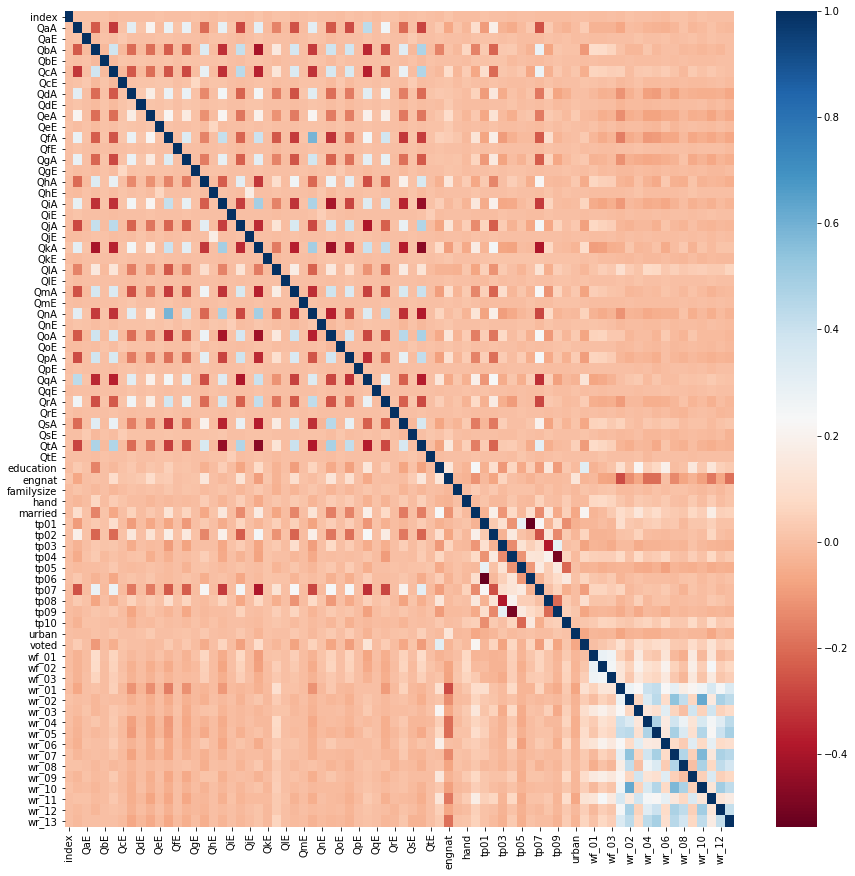

In [8]:
import seaborn as sns

# 각 피처별로 상관도를 구한 뒤 시각화
plt.figure(figsize=(15, 15))
corr = vote_df.corr()
sns.heatmap(corr, cmap="RdBu")

# 데이터 전처리

### 인덱스 제거

In [4]:
vote_df.drop("index", axis=1, inplace=True)
test_index = test_df["index"] # test_submission을 위해 저장
test_df.drop("index", axis=1, inplace=True)

### 시간 데이터 (적용 X)
- Q_E 시간 데이터는 의미가 없을 수도 있다고 생각하여 시간 데이터를 모두 제거하고 실험을 진행해보았다.
- 성능에 별다른 차이점이 나타나지 않았다.

In [ ]:
Q_E = []
for i in range(97, 117):
    a = 'Q' + chr(i) + 'E'
    Q_E.append(a)

for i in Q_E :
    vote_df.drop(i, axis=1, inplace=True)
    test_df.drop(i, axis=1, inplace=True)

### 인코딩

- age_group 컬럼에 대해서는 레이블 인코딩을 진행하였고, 0번 값은 '70s' 이므로 0번을 7번으로 수정하였다.
- engnat, gender, hand, married, race, religion, urban, wr_, wf_ 컬럼은 항목간의 상관관계가 없다고 판단하여 원핫 인코딩을 진행하였다.

In [5]:
# 레이블 인코딩
encoder = LabelEncoder()
encoder_test = LabelEncoder()

encoder.fit(vote_df['age_group'])
encoder_test.fit(test_df['age_group'])
labels = encoder.transform(vote_df['age_group'])
labels_test = encoder_test.transform(test_df['age_group'])

vote_df['age_group'] = labels
test_df['age_group'] = labels_test

print("인코딩 클래스: ", encoder.classes_)

def get_categoty_age(age_num):
    num = age_num
    if age_num == 0:
        num = 7
    return num

vote_df["age_group"] = vote_df["age_group"].apply(lambda x : get_categoty_age(x))
test_df["age_group"] = test_df["age_group"].apply(lambda x : get_categoty_age(x))

# 원핫 인코딩
def dummy_data(data, columns) :
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ['engnat', 'gender','hand', 'married', 'race', 'religion', 'urban']
# wr 추가
for i in range(1, 14):
    s = 'wr_' + chr(48+(i//10)) + chr(48+(i%10))
    dummy_columns.append(s)
# wf 추가
for i in range(1, 4):
    s = 'wf_' + chr(48+(i//10)) + chr(48+(i%10))
    dummy_columns.append(s)
# print(dummy_columns)

vote_df = dummy_data(vote_df, dummy_columns)
test_df = dummy_data(test_df, dummy_columns)


인코딩 클래스:  ['+70s' '10s' '20s' '30s' '40s' '50s' '60s']


## 이상값 처리

### tp_ 데이터 이상값 처리
- education, engnat, hand, urban 항목의 무응답도 데이터로서 가치가 있다고 판단하여 무응답 데이터에 대한 전처리 작업을 진행하지 않았다.
- tp_ 항목의 범위는 01~07 이므로 0 값에 대한 전처리 작업을 진행하였다.

In [6]:
# 0값을 검사할 tp 리스트
zero_features = []
for i in range(1, 11):
    s = 'tp' + chr(48+(i//10)) + chr(48+(i%10))
    zero_features.append(s)
    
# 전체 데이터 건수
total_count = vote_df['education'].count()
print("전체 데이터 건수는 ", total_count)

## train data
# 피처별로 반복하면서 데이터 값이 01~07을 벗어난 데이터 건수 추출하고 퍼센트 계산
for feature in zero_features:
    cnt = vote_df[vote_df[feature] < 1][feature].count() + vote_df[vote_df[feature] > 7][feature].count()
    print('{0} 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, cnt, 100*cnt/total_count))
print()

for feature in zero_features:
    cnt1 = vote_df[vote_df[feature] > 7][feature].count()
    cnt2 = vote_df[vote_df[feature] == 0][feature].count() # tp_ 데이터 이상값이 모두 0임을 확인
    cnt3 = vote_df[vote_df[feature] < 0][feature].count()
    print("%d\t%d\t%d" % (cnt1, cnt2, cnt3))
print()
    
## test data
for feature in zero_features:
    cnt = test_df[test_df[feature] < 1][feature].count() + test_df[test_df[feature] > 7][feature].count()
    print('{0} 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, cnt, 100*cnt/total_count))
print()

for feature in zero_features:
    cnt1 = test_df[test_df[feature] > 7][feature].count()
    cnt2 = test_df[test_df[feature] == 0][feature].count() # tp_ 데이터 이상값이 모두 0임을 확인
    cnt3 = test_df[test_df[feature] < 0][feature].count()
    print("%d\t%d\t%d" % (cnt1, cnt2, cnt3))
print()
    
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체
vote_df[zero_features] = vote_df[zero_features].replace(0, vote_df[zero_features].mean())
test_df[zero_features] = test_df[zero_features].replace(0, test_df[zero_features].mean())

전체 데이터 건수는  36425
tp01 건수는 3822, 퍼센트는 10.49 %
tp02 건수는 4356, 퍼센트는 11.96 %
tp03 건수는 9348, 퍼센트는 25.66 %
tp04 건수는 4414, 퍼센트는 12.12 %
tp05 건수는 12682, 퍼센트는 34.82 %
tp06 건수는 7148, 퍼센트는 19.62 %
tp07 건수는 7858, 퍼센트는 21.57 %
tp08 건수는 2547, 퍼센트는 6.99 %
tp09 건수는 7027, 퍼센트는 19.29 %
tp10 건수는 1158, 퍼센트는 3.18 %

0	3822	0
0	4356	0
0	9348	0
0	4414	0
0	12682	0
0	7148	0
0	7858	0
0	2547	0
0	7027	0
0	1158	0

tp01 건수는 961, 퍼센트는 2.64 %
tp02 건수는 1082, 퍼센트는 2.97 %
tp03 건수는 2219, 퍼센트는 6.09 %
tp04 건수는 1023, 퍼센트는 2.81 %
tp05 건수는 3090, 퍼센트는 8.48 %
tp06 건수는 1764, 퍼센트는 4.84 %
tp07 건수는 1953, 퍼센트는 5.36 %
tp08 건수는 637, 퍼센트는 1.75 %
tp09 건수는 1772, 퍼센트는 4.86 %
tp10 건수는 288, 퍼센트는 0.79 %

0	961	0
0	1082	0
0	2219	0
0	1023	0
0	3090	0
0	1764	0
0	1953	0
0	637	0
0	1772	0
0	288	0



### familysize 데이터  이상값 처리
- vote_df.describe을 수행하면 familysize의 최대가 999임을 확인할 수 있다
- familysize 항목에 이상치 데이터가 존재할 것으로 판단하여 boxplot으로 확인 후 이상치 데이터를 제거하였다.

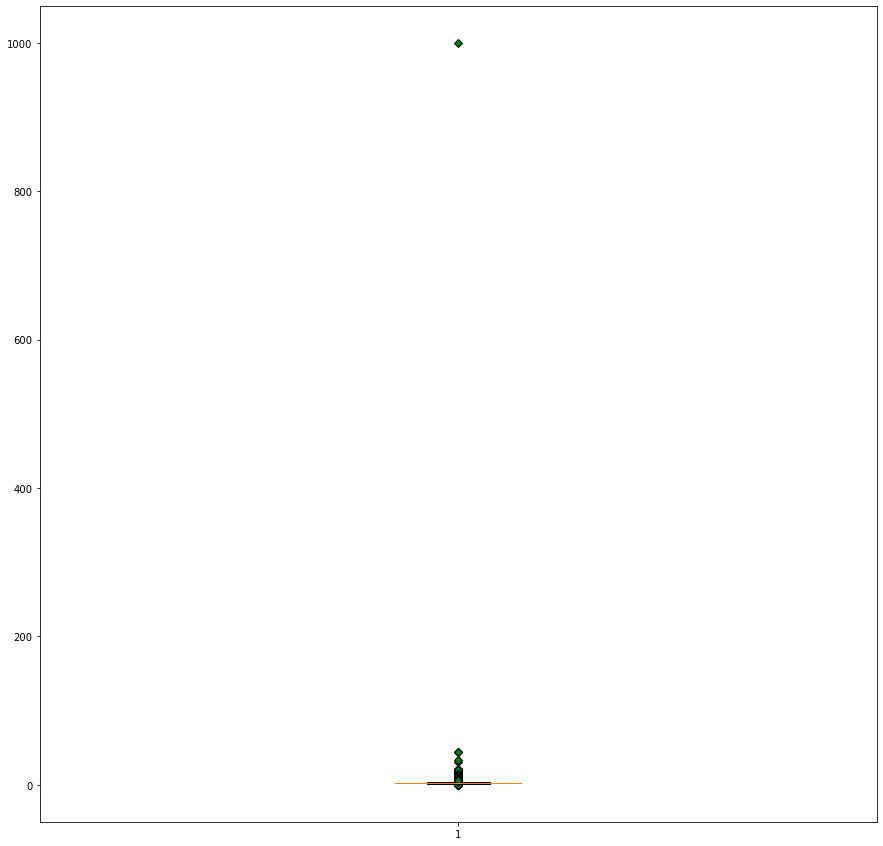

In [7]:
plt.figure(figsize=(15, 15))
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(vote_df['familysize'], flierprops=green_diamond)
plt.show()

In [7]:
# familysize 25 이상인 이상치 데이터 제거
def get_outlier(df=None, column=None):
    fraud = df[column]
    outlier_value = fraud[fraud > 25]
    return outlier_value

## train data
# 이상치 데이터를 제외한 나머지 데이터의 평균 구하기
familysize_len = len(vote_df["familysize"])
familysize_sum = vote_df["familysize"].sum()
outlier_value = get_outlier(df=vote_df, column="familysize")

for i in outlier_value:
    familysize_sum = familysize_sum - i
familysize_mean = familysize_sum // familysize_len

# 이상치 데이터를 평균값으로 대체
for i in outlier_value:
    vote_df["familysize"] = vote_df["familysize"].replace(i, familysize_mean)

## test data
# 이상치 데이터를 제외한 나머지 데이터의 평균 구하기
familysize_mean = 0
familysize_len = len(test_df["familysize"])
familysize_sum = test_df["familysize"].sum()
outlier_value = get_outlier(df=test_df, column="familysize")

for i in outlier_value:
    familysize_sum = familysize_sum - i    
familysize_mean = familysize_sum // familysize_len

# 이상치 데이터를 평균값으로 대체
for i in outlier_value:
    test_df["familysize"] = test_df["familysize"].replace(i, familysize_mean)

### 잘못된 이상치 데이터 선정 (과적합 발생)
- 1차 제출시 이상치 데이터의 수가 가장 많은 항목들 중 전처리할 항목을 선택했으나, 이로 인해 과적합 문제가 발생하였다.
- 2차에서는 아래와 같은 방법을 사용하지 않았다.

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['voted']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index    
    return outlier_index

# outlier_index 개수 확인
for col in vote_df.columns.values.tolist():
    outlier_index = get_outlier(df=vote_df, column=col, weight=1.5)
    print(col, " / ", len(outlier_index))

# drop outlier of race_White, religion_Agnostic  religion_Atheist  
outlier_index = get_outlier(df=vote_df, column="race_White", weight=1.5)
vote_df.drop(outlier_index, axis=0, inplace=True)

outlier_index = get_outlier(df=vote_df, column="religion_Agnostic", weight=1.5)
vote_df.drop(outlier_index, axis=0, inplace=True)

outlier_index = get_outlier(df=vote_df, column="religion_Atheist", weight=1.5)
vote_df.drop(outlier_index, axis=0, inplace=True)

### 시간 데이터  이상값 처리
- 시간 데이터 전처리할 시 값을 1000 단위로 나누어 데이터의 범위를 정규화하는 작업을 진행했다.
- 카테고리들 중 제거할 카테고리를 임의로 지정하여 제거한 후, 성능을 측정하는 방식을 반복하며 실험을 진행하였다.
- 카테고리 값이 8 이상일 경우 이상치 데이터로 판단하여 최종적으로 값을 제거했다.

In [8]:
# Q_E 항목을 담는 리스트 생성
Q_E = []
for i in range(97, 117):
    a = 'Q' + chr(i) + 'E'
    Q_E.append(a)

# 정규화를 위한 함수
def get_categoty_time(Q_time):
    cat = 0
    if Q_time <= 1000 : cat = 1
    elif Q_time <= 2000 : cat = 2
    elif Q_time <= 3000 : cat = 3
    elif Q_time <= 4000 : cat = 4
    elif Q_time <= 5000 : cat = 5
    elif Q_time <= 6000 : cat = 6
    elif Q_time <= 7000 : cat = 7
    elif Q_time <= 8000 : cat = 8
    elif Q_time <= 9000 : cat = 9
    elif Q_time <=10000 : cat = 10
    elif Q_time <=15000 : cat = 11
    elif Q_time <=20000 : cat = 12
    else : Q_time = 13

    return cat

# 정규화 작업 진행
for Q_time in Q_E:
    vote_df[Q_time] = vote_df[Q_time].apply(lambda x : get_categoty_time(x))
    test_df[Q_time] = test_df[Q_time].apply(lambda x : get_categoty_time(x))
    
# 값이 8 이상인 이상치 데이터 평균값으로 대체
def get_outlier_QE(df=None, column=None):
    fraud = df[column]
    outlier_value = fraud[fraud > 9]
    return outlier_value

## train data
for Q_time in Q_E:
    # 이상치 데이터를 제외한 나머지 데이터의 평균 구하기
    data_mean = 0
    data_len = len(vote_df[Q_time])
    data_sum = vote_df[Q_time].sum()
    outlier_value = get_outlier_QE(df=vote_df, column=Q_time)

    for i in outlier_value:
        data_sum = data_sum - i    
    data_mean = data_sum // data_len

    # 이상치 데이터를 평균값으로 대체
    for i in outlier_value:
        vote_df[Q_time] = vote_df[Q_time].replace(i, data_mean)
        
## test data
for Q_time in Q_E:
    # 이상치 데이터를 제외한 나머지 데이터의 평균 구하기
    data_mean = 0
    data_len = len(test_df[Q_time])
    data_sum = test_df[Q_time].sum()
    outlier_value = get_outlier_QE(df=test_df, column=Q_time)

    for i in outlier_value:
        data_sum = data_sum - i    
    data_mean = data_sum // data_len

    # 이상치 데이터를 평균값으로 대체
    for i in outlier_value:
        test_df[Q_time] = test_df[Q_time].replace(i, data_mean)
    
    
# for Q_time in Q_E:
#     outlier_index = get_outlier_QE(df=vote_df, column=Q_time)
#     vote_df.drop(outlier_index, axis=0, inplace=True)

# for Q_time in Q_E:
#     outlier_index = get_outlier_QE(df=test_df, column=Q_time)
#     test_df.drop(outlier_index, axis=0, inplace=True)


# 모델 학습

In [9]:
# label/feature 분리 및 학습세트/평가세트 분리
y_labels = vote_df.loc[:,'voted']
X_features = vote_df.drop('voted', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

# 분포 비율 확인
train_cnt = y_train.count()
test_cnt = y_test.count()

print("학습 세트 Shape:{0}, 테스트 세트 Shape:{1}".format(X_train.shape, X_test.shape))
print(" 학습 세트 레이블 값 분포 비율")
print(y_train.value_counts()/train_cnt)
print("\n 테스트 세트 레이블 값 분포 비율")
print(y_test.value_counts()/test_cnt)
print()

학습 세트 Shape:(29140, 121), 테스트 세트 Shape:(7285, 121)
 학습 세트 레이블 값 분포 비율
0    0.54571
1    0.45429
Name: voted, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.55127
1    0.44873
Name: voted, dtype: float64



### 데이터 정규화 및 샘플링
- 데이터 정규화 (standard scaling), 오버샘플링, smote 오버샘플링, 언더샘플링을 각각 해보며 실험을 진행하였다.
- 시간 데이터는 이미 앞에서 정규화를 진행하였으므로 열에서 제외하였다.

In [10]:
# 데이터 정규화(스케일링)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test_sc = scaler.transform(test_df) # test data scaling
# test_sc = pd.DataFrame(test_sc, columns=test_df.columns, index=list(test_df.index.values))

# oversampling
over_sampler = RandomOverSampler(random_state=156)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

In [ ]:
# # smote oversampling
# smote = SMOTE(random_state=156)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# # undersampling 진행
# under_sampler = RandomUnderSampler(random_state=156)
# X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# CV 세트 기반의 스태킹
- 랜덤 포레스트, 결정트로, ada boost 모델을 사용하였다.
- 최종 모델로는 XGB 모델을 사용하였다.

### 스태킹에서 사용할 모델 하이퍼 파라미터 튜닝
GridSearchCV 사용
- 각 모델에 대해 파라미터 리스트 내부 값들을 변경하면서 최적의 파라미터를 찾는 실험을 진행하였다.
- 실험 결과로 나온 최적의 파라미터를 그대로 사용하지 않고, 과적합을 고려하여 파라미터를 설정하였다.

In [17]:
# 하이퍼 파라미터 튜닝
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

knn_clf  = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state=156)
dt_clf = DecisionTreeClassifier(random_state=156)
ada_clf = AdaBoostClassifier(random_state=156)

# knn_clf
parameters = {'n_neighbors':[2,4,6]}

grid_dclf = GridSearchCV(knn_clf , param_grid=parameters , scoring='f1' , cv=5)
grid_dclf.fit(X_train , y_train)

print('knn_clf 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
dpredictions_proba = best_dclf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, dpredictions, dpredictions_proba)

# rf_clf
parameters = {'n_estimators':[100,400], 'max_depth':[4,6,8], 'min_samples_leaf':[3,5,7], 'min_samples_split':[3,5,7]}

grid_dclf = GridSearchCV(rf_clf , param_grid=parameters , scoring='f1' , cv=5, n_jobs=-1)
grid_dclf.fit(X_train , y_train)

print('rf_clf 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
dpredictions_proba = best_dclf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, dpredictions, dpredictions_proba)

# dt_clf
parameters = {'max_depth':[5], 'min_samples_split':[3,5,7], 'min_samples_leaf':[3,5,7]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='f1' , cv=5)
grid_dclf.fit(X_train , y_train)

print('dt_clf 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
dpredictions_proba = best_dclf.predict_proba(X_test)[:,1]
 
get_clf_eval(y_test, dpredictions, dpredictions_proba)

# ada_clf
parameters = {'n_estimators':[100,400]}

grid_dclf = GridSearchCV(ada_clf , param_grid=parameters , scoring='f1' , cv=5)
grid_dclf.fit(X_train , y_train)

print('ada_clf 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
dpredictions_proba = best_dclf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, dpredictions, dpredictions_proba)


knn_clf 최적 하이퍼 파라미터 : {'n_neighbors': 6}
오차 행렬
[[2782  753]
 [1830 1178]]
정확도: 0.6052, 정밀도: 0.6100, 재현율: 0.3916, F1: 0.4770, AUC:0.6454
rf_clf 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
오차 행렬
[[2397 1138]
 [ 948 2060]]
정확도: 0.6812, 정밀도: 0.6442, 재현율: 0.6848, F1: 0.6639, AUC:0.7505
dt_clf 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 3}
오차 행렬
[[2170 1365]
 [ 715 2293]]
정확도: 0.6821, 정밀도: 0.6268, 재현율: 0.7623, F1: 0.6880, AUC:0.7471
ada_clf 최적 하이퍼 파라미터 : {'n_estimators': 100}
오차 행렬
[[2317 1218]
 [ 851 2157]]
정확도: 0.6838, 정밀도: 0.6391, 재현율: 0.7171, F1: 0.6759, AUC:0.7512


### CV 세트 기반의 스태킹 학습

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=156)
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        model.fit(X_tr , y_tr)       
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    return train_fold_pred , test_pred_mean

y_train = y_train.to_numpy()

# 개별 모델을 위한 Classifier 생성.
# knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=3, min_samples_split=3, random_state=156)
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, min_samples_split=3)
ada_clf = AdaBoostClassifier(n_estimators=100)

# knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)


C:\Users\eunseo\anaconda3\envs\ssu\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


C:\Users\eunseo\anaconda3\envs\ssu\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


C:\Users\eunseo\anaconda3\envs\ssu\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [13]:
Stack_final_X_train = np.concatenate((rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

# 최종 모델
evals = [(Stack_final_X_test, y_test)]
stacking_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", random_state=156)

stacking_model.fit(Stack_final_X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = stacking_model.predict(Stack_final_X_test)
pred_proba = stacking_model.predict_proba(Stack_final_X_test)[:,1]

get_clf_eval(y_test, preds, pred_proba)

원본 학습 피처 데이터 Shape: (29140, 121) 원본 테스트 피처 Shape: (7285, 121)
스태킹 학습 피처 데이터 Shape: (29140, 3) 스태킹 테스트 피처 데이터 Shape: (7285, 3)
[0]	validation_0-logloss:0.675409
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.661058
[2]	validation_0-logloss:0.649297
[3]	validation_0-logloss:0.639634
[4]	validation_0-logloss:0.631701
[5]	validation_0-logloss:0.625143
[6]	validation_0-logloss:0.619726
[7]	validation_0-logloss:0.615239
[8]	validation_0-logloss:0.611562
[9]	validation_0-logloss:0.608519
[10]	validation_0-logloss:0.605951
[11]	validation_0-logloss:0.603858
[12]	validation_0-logloss:0.602143
[13]	validation_0-logloss:0.600713
[14]	validation_0-logloss:0.599491
[15]	validation_0-logloss:0.59857
[16]	validation_0-logloss:0.597741
[17]	validation_0-logloss:0.597069
[18]	validation_0-logloss:0.59652
[19]	validation_0-logloss:0.596071
[20]	validation_0-logloss:0.595696
[21]	validation_0-logloss:0.595401
[22]	validation_0-logloss:0.595102
[23]	validat

# XGBoost 모델

### XGBoost에서 사용할 모델 하이퍼 파라미터 튜닝
- 하이퍼 파라미터 값을 조금씩 수정하며 튜닝하는 실험을 진행하였다.

In [ ]:
# 하이퍼파라미터 수정 학습과정 및 결과
evals = [(X_test, y_test)]
xgb_model = XGBClassifier(n_estimators=400,
                          learning_rate=0.1,
                          colsample_bytree= 1.0,
                          max_depth= 12,
                          min_child_weight= 5,
                          min_split_gain= 0.1,
                          num_leaves= 40.91732192323167,
                          reg_alpha= 0.5,
                          reg_lambda= 0.5,
                          subsample= 1)
xgb_model.fit(X_train_over, y_train_over, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
w_preds = xgb_model.predict(X_test)
w_pred_proba = xgb_model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)


#도출되었던 최적 하이퍼파라미터 값
{'target': 0.9724714510197174,
 'params': {'colsample_bytree': 1.0,
  'max_depth': 12.0,
  'min_child_weight': 5.0,
  'min_split_gain': 0.1,
  'num_leaves': 40.91732192323167,
  'reg_alpha': 0.5,
  'reg_lambda': 0.5,
  'subsample': 1.0}}

### XGBoost 학습

In [11]:
# 학습
evals = [(X_test, y_test)]
xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", random_state=156)

xgb_model.fit(X_train_over, y_train_over, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = xgb_model.predict(X_test)
pred_proba = xgb_model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.674474
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.659175
[2]	validation_0-logloss:0.646469
[3]	validation_0-logloss:0.635943
[4]	validation_0-logloss:0.627367
[5]	validation_0-logloss:0.62007
[6]	validation_0-logloss:0.613812
[7]	validation_0-logloss:0.608532
[8]	validation_0-logloss:0.604095
[9]	validation_0-logloss:0.600065
[10]	validation_0-logloss:0.596803
[11]	validation_0-logloss:0.59388
[12]	validation_0-logloss:0.591228
[13]	validation_0-logloss:0.588949
[14]	validation_0-logloss:0.586739
[15]	validation_0-logloss:0.585017
[16]	validation_0-logloss:0.58325
[17]	validation_0-logloss:0.582029
[18]	validation_0-logloss:0.580762
[19]	validation_0-logloss:0.57984
[20]	validation_0-logloss:0.578855
[21]	validation_0-logloss:0.578043
[22]	validation_0-logloss:0.577242
[23]	validation_0-logloss:0.576731
[24]	validation_0-logloss:0.576044
[25]	validation_0-logloss:0.575518
[26]	validation_0-logloss:0.575025


[230]	validation_0-logloss:0.567614
[231]	validation_0-logloss:0.567589
[232]	validation_0-logloss:0.567617
[233]	validation_0-logloss:0.567668
[234]	validation_0-logloss:0.56768
[235]	validation_0-logloss:0.567669
[236]	validation_0-logloss:0.567712
[237]	validation_0-logloss:0.567686
[238]	validation_0-logloss:0.567698
[239]	validation_0-logloss:0.567586
[240]	validation_0-logloss:0.567509
[241]	validation_0-logloss:0.567538
[242]	validation_0-logloss:0.567576
[243]	validation_0-logloss:0.567562
[244]	validation_0-logloss:0.567579
[245]	validation_0-logloss:0.567522
[246]	validation_0-logloss:0.567538
[247]	validation_0-logloss:0.567534
[248]	validation_0-logloss:0.567576
[249]	validation_0-logloss:0.567514
[250]	validation_0-logloss:0.567539
[251]	validation_0-logloss:0.567533
[252]	validation_0-logloss:0.567584
[253]	validation_0-logloss:0.567608
[254]	validation_0-logloss:0.567602
[255]	validation_0-logloss:0.567634
[256]	validation_0-logloss:0.567645
[257]	validation_0-logloss:0.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

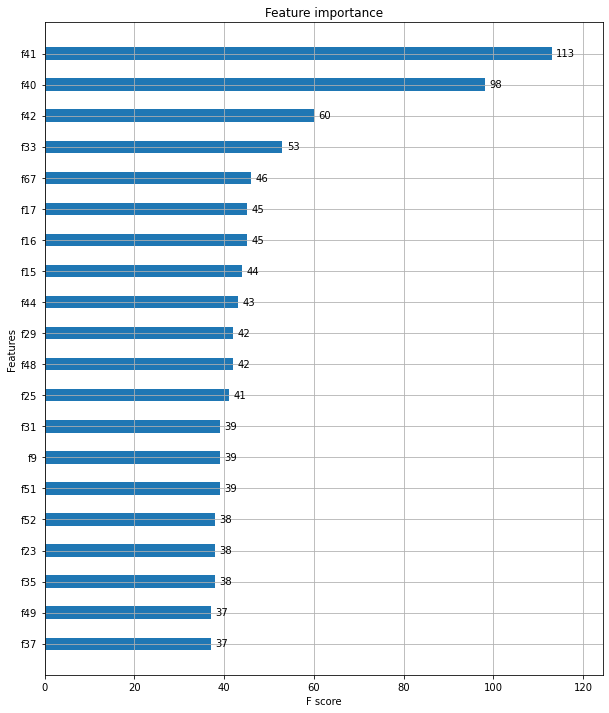

In [12]:
from xgboost import plot_importance
fig, ax = plt.subplots(1, 1, figsize=(10,12))
plot_importance(xgb_model, ax=ax, max_num_features=20, height=0.4)

In [13]:
print(vote_df.columns[41])
print(vote_df.columns[40])
print(vote_df.columns[42])
print(vote_df.columns[33])
print(vote_df.columns[67])

education
age_group
familysize
QqE
race_Arab


# 임계값 설정
threshold 값을 변경하며 실험을 진행하였다.

1. CV 세트 기반의 스태킹 앙상블 모델 사용
    - 임계값이 0.45일때가 가장 성능이 좋았다.
    - 오차 행렬
    [[2222 1794]
     [ 497 2772]]
    - 정확도: 0.6855, 정밀도: 0.6071, 재현율: 0.8480, F1: 0.7076, AUC:0.7212
2. XGBoost 모델 사용
    - 임계값이 0.4일때가 가장 성능이 좋았다.
    - 오차 행렬
    [[2037 1979]
     [ 356 2913]]
    - 정확도: 0.6795, 정밀도: 0.5955, 재현율: 0.8911, F1: 0.7139, AUC:0.7634

In [14]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.3, 0.35, 0.4, 0.45, 0.50, 0.55, 0.60]

def get_clf_eval_2(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval_2(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba.reshape(-1,1), thresholds )


임곗값: 0.3
오차 행렬
[[1677 2339]
 [ 208 3061]]
정확도: 0.6504, 정밀도: 0.5669, 재현율: 0.9364, F1:0.7062
임곗값: 0.35
오차 행렬
[[1872 2144]
 [ 280 2989]]
정확도: 0.6673, 정밀도: 0.5823, 재현율: 0.9143, F1:0.7115
임곗값: 0.4
오차 행렬
[[2037 1979]
 [ 356 2913]]
정확도: 0.6795, 정밀도: 0.5955, 재현율: 0.8911, F1:0.7139
임곗값: 0.45
오차 행렬
[[2205 1811]
 [ 452 2817]]
정확도: 0.6894, 정밀도: 0.6087, 재현율: 0.8617, F1:0.7134
임곗값: 0.5
오차 행렬
[[2405 1611]
 [ 641 2628]]
정확도: 0.6909, 정밀도: 0.6200, 재현율: 0.8039, F1:0.7001
임곗값: 0.55
오차 행렬
[[2635 1381]
 [ 882 2387]]
정확도: 0.6894, 정밀도: 0.6335, 재현율: 0.7302, F1:0.6784
임곗값: 0.6
오차 행렬
[[2880 1136]
 [1202 2067]]
정확도: 0.6791, 정밀도: 0.6453, 재현율: 0.6323, F1:0.6388


In [15]:
# Binarizer의 threshold 설정값을 0.4로 설정
custom_threshold = 0.4
pred_proba_1 = pred_proba.reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict, pred_proba)

오차 행렬
[[2037 1979]
 [ 356 2913]]
정확도: 0.6795, 정밀도: 0.5955, 재현율: 0.8911, F1: 0.7139, AUC:0.7634


# 테스트 데이터 예측

### XGBoost 테스트 데이터 예측 실험
- xgb 모델로 예측을 시도하였으나 오류가 발생하였고, 학습한 데이터의 index 수가 test 데이터와 다른 것이 오류의 원인으로 생각하였다.
- test_df와 index 수가 같게 하여 학습을 한 후에 예측을 진행할 경우, 예측 값에 버그가 발생하지 않는 것을 확인하였다.
- 이 과정을 여러 번 반복하여 값을 확인한 결과 값의 변동률이 심한 것을 확인하였다.
- for문으로 수차례 학습하고 예측하기를 반복 후 해당 예측 값들을 평균을 내었다.
- 평균 값을 넘으면 pred를 1로 아니면 0으로 값을 설정 하였다. (평균으로 한 이유는 0.5나 기타 다른 값으로 할 경우 랜덤한 평균 값이 나오는 예측 결과 값을 통제 할 수 없었기 때문이다.)

In [ ]:
xgb_model_test = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", random_state=156)
pred_proba
num = 150
for i in range(num):
    xgb_model_test.fit(X_features.sample(9107), y_labels.sample(9107))
    pred_proba = xgb_model_test.predict_proba(test_sc)[:,1]
    
pred_proba_test = pred_proba/num
preds_test =1
test_submission = pd.DataFrame({"index" : test_index,
                                "pred_prob" : pred_proba_test,
                                "pred" : preds_test})

#평균 값 구한 후 pred 값을 1 or 0으로 설정하는 부분
num1 = 0;

for i in range(test_submission.shape[0]):
        num1 += test_submission['pred_prob'][i]
print(num1/test_submission.shape[0])

num2 = 0;

for i in range(test_submission.shape[0]):
    if (test_submission['pred_prob'][i]) > (num1/test_submission.shape[0]):
        num2 +=1
        test_submission['pred'][i] = 1
    else: test_submission['pred'][i] = 0
print(num2)

### XGBoost 모델을 사용하여 최종 테스트 데이터 예측

In [16]:
preds_test = xgb_model.predict(test_sc)
pred_proba_test = xgb_model.predict_proba(test_sc)[:,1]

# Binarizer의 threshold 설정값을 0.4로 설정
custom_threshold = 0.4
pred_proba_test_1 = pred_proba_test.reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_test_1)

custom_predict = binarizer.transform(pred_proba_test_1)[:,0]
custom_predict = custom_predict.astype(np.int64)

test_submission = pd.DataFrame({"index" : test_index,
                                "pred_prob" : pred_proba_test,
                                "pred" : custom_predict})

In [17]:
test_submission.head(10)

,index,pred_prob,pred
0,38741,0.508075,1
1,43904,0.756351,1
2,41036,0.241923,0
3,6939,0.252884,0
4,14682,0.524843,1
5,35469,0.411433,1
6,33948,0.671561,1
7,3082,0.015478,0
8,33291,0.733901,1
9,32694,0.717731,1


In [18]:
test_submission.to_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\experiment_2\\test_submission.csv", index = False)

In [19]:
# 결과 확인
test_result_df = pd.read_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\experiment_2\\test_submission.csv", encoding="utf-8")
test_result_df.head(10)

,index,pred_prob,pred
0,38741,0.508075,1
1,43904,0.756351,1
2,41036,0.241923,0
3,6939,0.252884,0
4,14682,0.524843,1
5,35469,0.411433,1
6,33948,0.671561,1
7,3082,0.015478,0
8,33291,0.733901,1
9,32694,0.717731,1
